In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(filename='model.log',
                    filemode='w',
                    format='%(name)s - %(levelname)s - %(message)s',
                    level=logging.INFO)

In [2]:
URL = "https://raw.githubusercontent.com/anirudhajohare19/SupplyChain_BusinessModel/refs/heads/main/SCM.csv"

df = pd.read_csv(URL)

df.sample(frac=1)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
14906,WH_114906,EID_64906,Rural,Small,North,Zone 1,3,0,3,5127,...,1,126,33.0,2013.0,9,1,B,4,31,11151
21056,WH_121056,EID_71056,Rural,Mid,West,Zone 3,8,0,3,4602,...,0,112,27.0,2011.0,17,0,B,5,19,20101
4318,WH_104318,EID_54318,Rural,Small,North,Zone 6,0,2,2,4889,...,1,116,32.0,NaN,11,0,C,6,8,13095
10467,WH_110467,EID_60467,Rural,Mid,North,Zone 3,2,0,3,5648,...,1,220,23.0,NaN,25,1,A+,4,19,32062
22076,WH_122076,EID_72076,Urban,Small,South,Zone 1,2,0,2,4611,...,1,98,24.0,NaN,27,0,A,6,21,34105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,WH_104624,EID_54624,Rural,Large,West,Zone 5,0,1,3,4518,...,1,240,21.0,NaN,23,0,B,5,10,28131
10480,WH_110480,EID_60480,Rural,Large,South,Zone 6,4,0,3,3552,...,1,187,25.0,2003.0,25,0,B+,4,29,29070
17064,WH_117064,EID_67064,Urban,Mid,West,Zone 4,1,0,2,8324,...,1,197,40.0,NaN,32,1,C,5,11,45134
8529,WH_108529,EID_58529,Rural,Large,West,Zone 6,1,0,4,4306,...,1,229,32.0,NaN,8,0,B,1,23,9098


In [3]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [5]:
Numerical_data = df.select_dtypes(exclude='object')
Categorical_data = df.select_dtypes(include='object')

In [6]:
Numerical_data

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,NaN,NaN,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,NaN,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,NaN,13,0,3,28,15055


In [7]:
Categorical_data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [8]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [9]:
from collections import OrderedDict

stats = []

for i in Numerical_data:

    numerical_stats = OrderedDict({
        'Feature': i,
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Mode': df[i].mode(),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Kurtosis': df[i].kurtosis(),
        'Skewness': df[i].skew()

    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report


,Feature,Mean,Median,Mode,Standard Deviation,Variance,Kurtosis,Skewness
0,num_refill_req_l3m,4.097020,4.0,"0 5 Name: num_refill_req_l3m, dtype: int64",2.606289,6.792745e+00,-1.218193,-0.081390
1,transport_issue_l1y,0.777201,0.0,"0 0 Name: transport_issue_l1y, dtype: int64",1.201747,1.444196e+00,1.820683,1.605424
2,Competitor_in_mkt,3.103928,3.0,"0 2 Name: Competitor_in_mkt, dtype: int64",1.142886,1.306188e+00,1.798511,0.985102
3,retail_shop_num,4983.115711,4859.0,"0 4808 Name: retail_shop_num, dtype: int64",1050.634225,1.103832e+06,1.846915,0.905324
4,distributor_num,42.386998,42.0,"0 21 Name: distributor_num, dtype: int64",16.057730,2.578507e+02,-1.187118,0.017210
5,flood_impacted,0.098691,0.0,"0 0 Name: flood_impacted, dtype: int64",0.298253,8.895490e-02,5.243614,2.691308
6,flood_proof,0.054492,0.0,"0 0 Name: flood_proof, dtype: int64",0.226991,5.152504e-02,13.412215,3.925685
7,electric_supply,0.656072,1.0,"0 1 Name: electric_supply, dtype: int64",0.475028,2.256516e-01,-1.568273,-0.657167
8,dist_from_hub,163.613725,164.0,"0 204 1 239 Name: dist_from_hub, dtype: ...",62.660709,3.926364e+03,-1.200679,-0.009042
9,workers_num,28.936398,28.0,"0 28.0 Name: workers_num, dtype: float64",7.843431,6.151941e+01,3.285720,1.042478


In [10]:
df.drop(columns=['wh_est_year'], axis=1, inplace=True)
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,0,1,203,28.0,22,1,A+,2,4,29138
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,0,170,NaN,26,0,C,5,9,33108
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,0,99,22.0,20,0,B+,6,4,24072
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,0,220,17.0,13,0,B,3,28,15055


<Axes: >

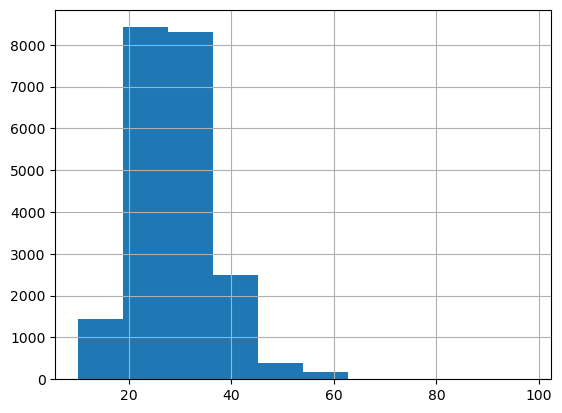

In [11]:
df.workers_num.hist()

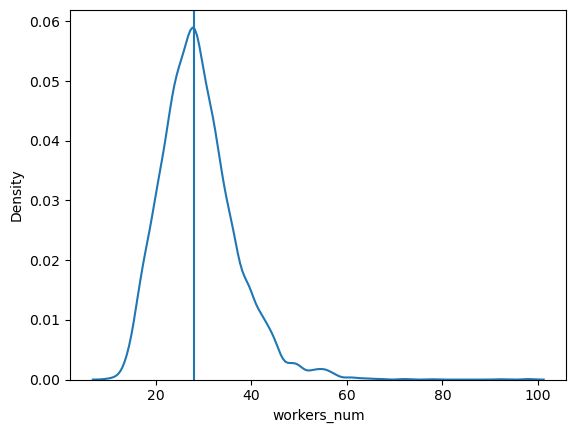

In [12]:
sns.kdeplot(df.workers_num)
plt.axvline(28)

In [13]:
df.workers_num.fillna(28, inplace=True)

In [14]:
df.isnull().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    805
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

<Axes: >

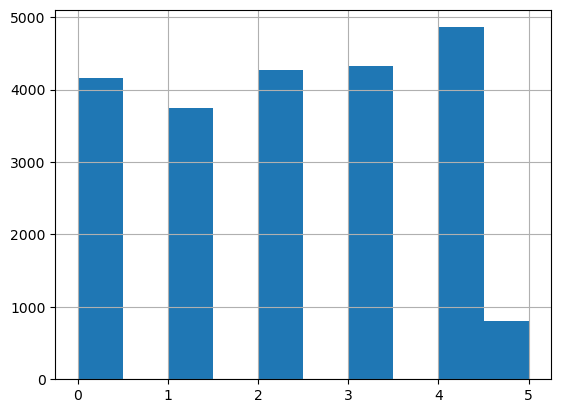

In [16]:
df.approved_wh_govt_certificate.hist()

In [17]:
df.approved_wh_govt_certificate.median()

2.0

In [18]:
df.approved_wh_govt_certificate.fillna(2, inplace=True)

In [19]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

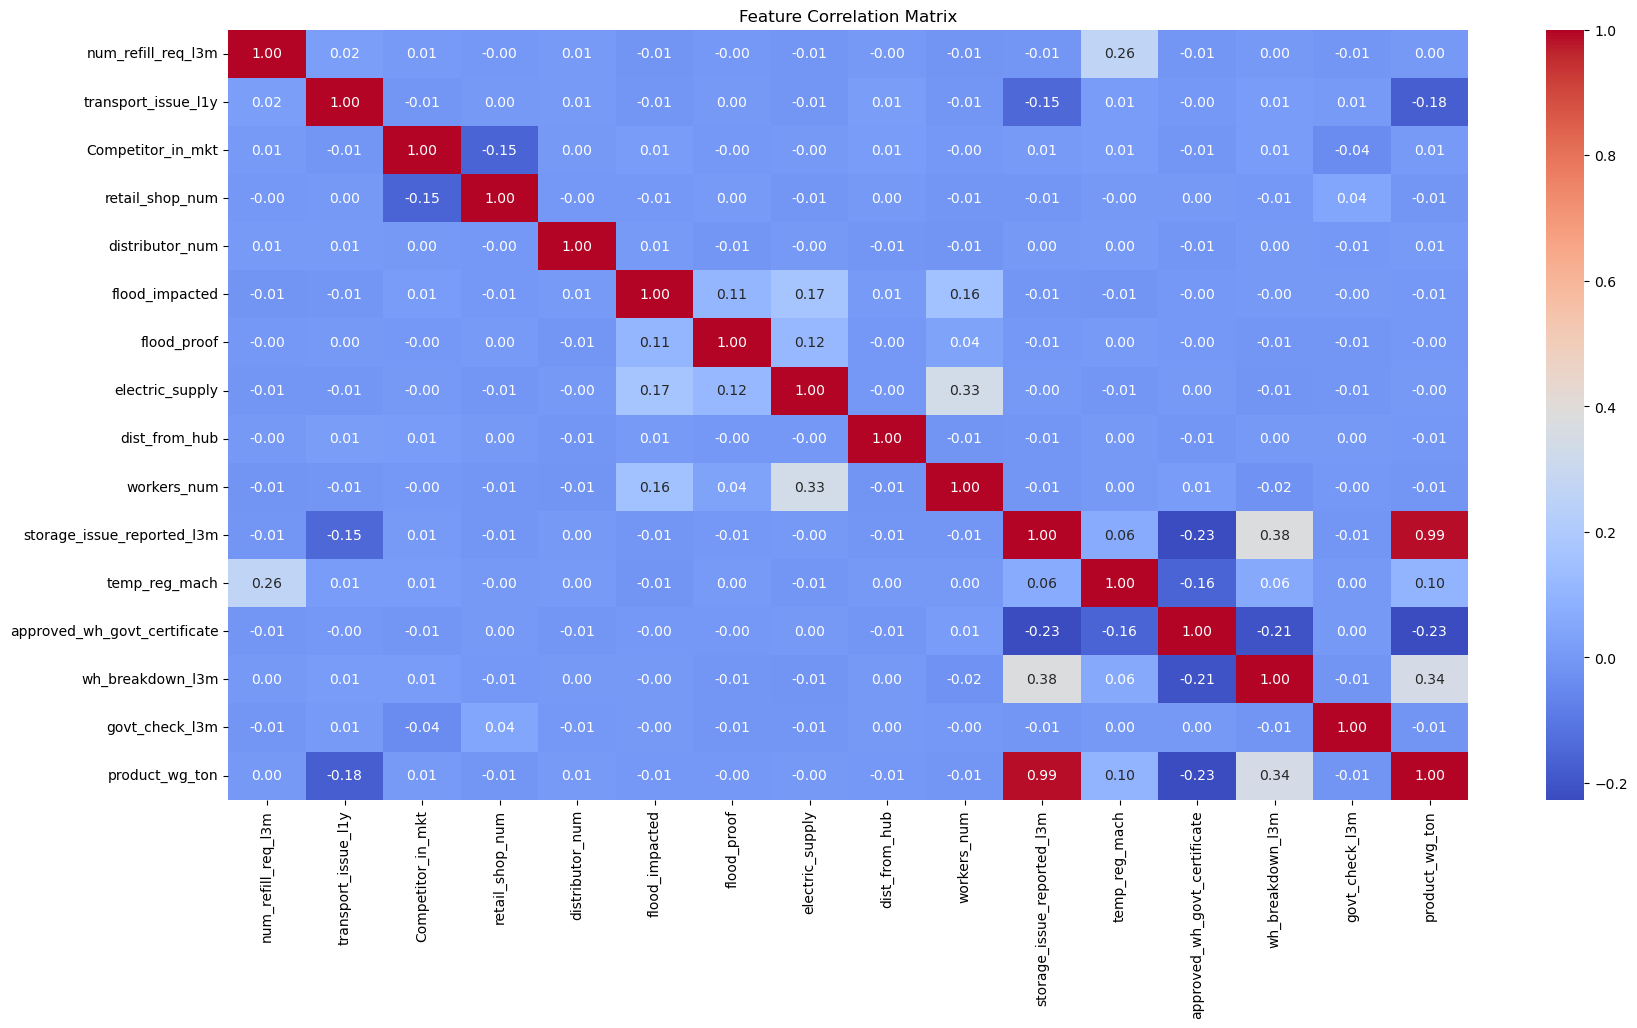

In [20]:
# Correlation Heatmap for numerical feature
plt.figure(figsize=(20, 10))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

<Axes: >

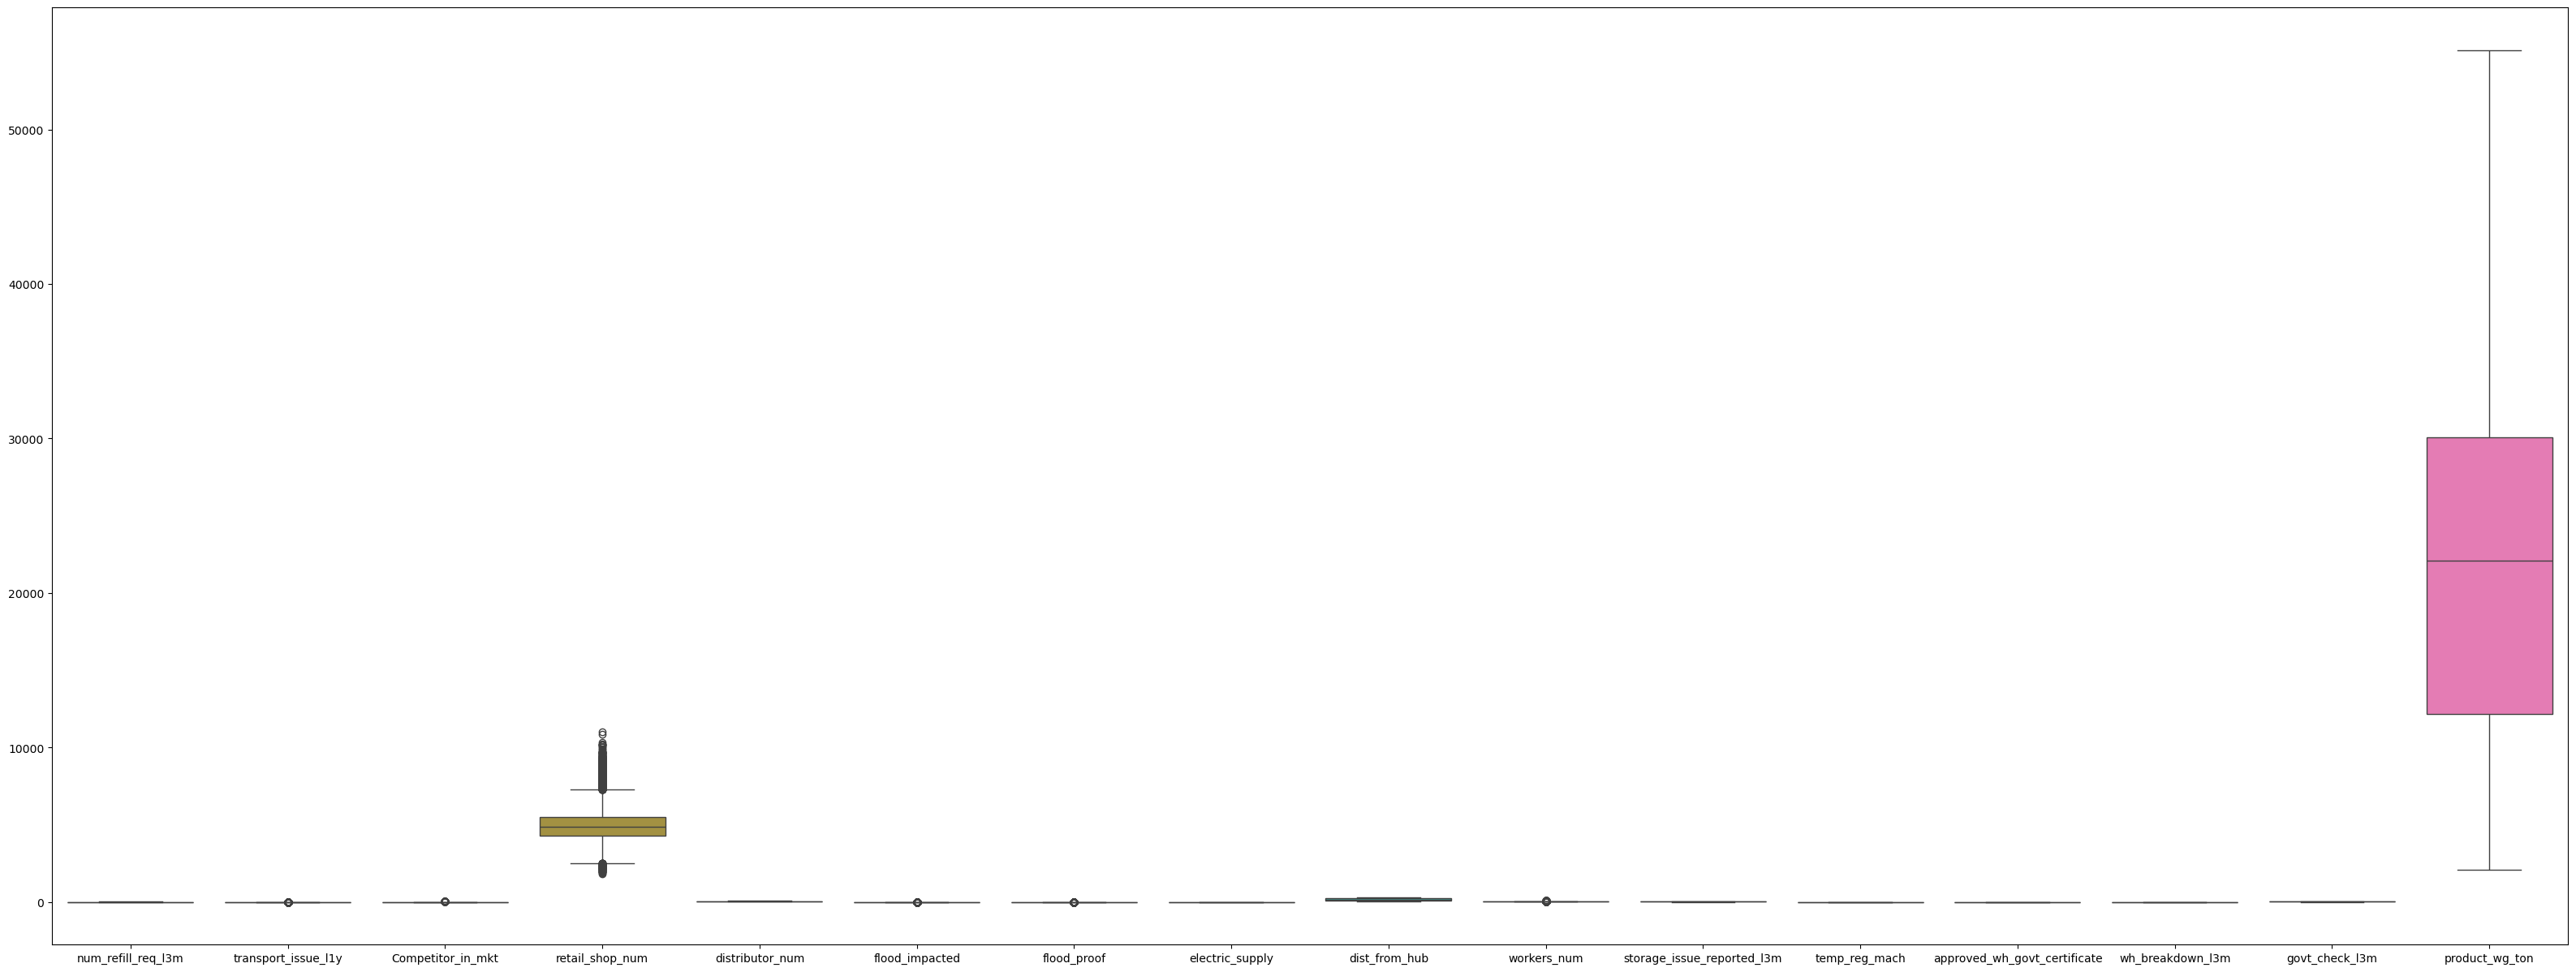

In [21]:
plt.figure(figsize=(40, 15))
sns.boxplot(df)

In [22]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'num_refill_req_l3m'.
Replaced 2628 outliers in 'transport_issue_l1y' with median.
Replaced 85 outliers in 'Competitor_in_mkt' with median.
Replaced 825 outliers in 'retail_shop_num' with median.
No outliers found in 'distributor_num'.
Replaced 2186 outliers in 'flood_impacted' with median.
Replaced 1207 outliers in 'flood_proof' with median.
No outliers found in 'electric_supply'.
No outliers found in 'dist_from_hub'.
Replaced 533 outliers in 'workers_num' with median.
No outliers found in 'storage_issue_reported_l3m'.
No outliers found in 'temp_reg_mach'.
No outliers found in 'approved_wh_govt_certificate'.
No outliers found in 'wh_breakdown_l3m'.
No outliers found in 'govt_check_l3m'.
No outliers found in 'product_wg_ton'.


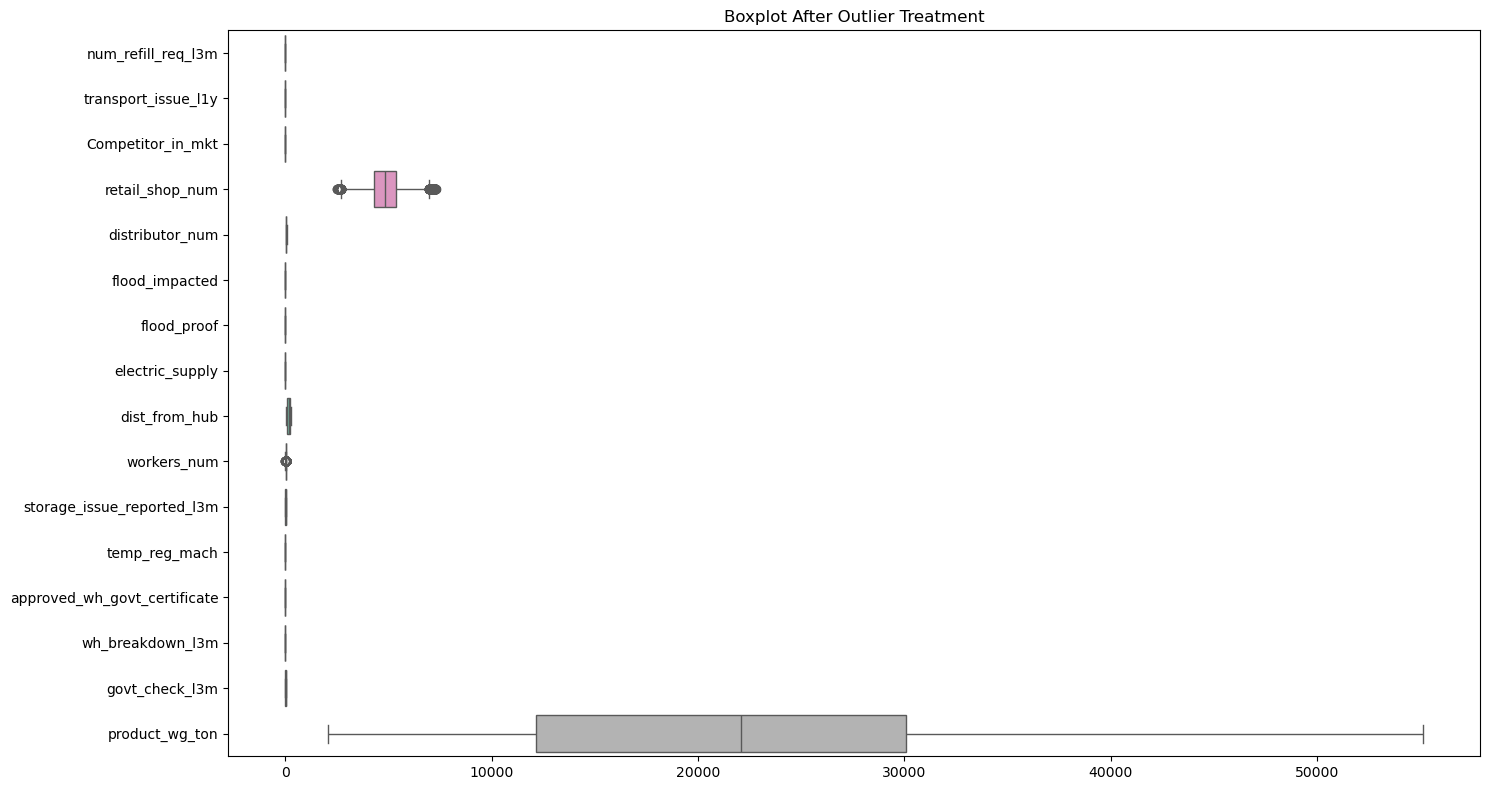

In [23]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [24]:
# df.drop(columns=['retail_shop_num'], axis=1, inplace=True)

In [25]:
le = LabelEncoder()
df['Ware_house_ID'] = le.fit_transform(df['Ware_house_ID'])
df['WH_Manager_ID'] = le.fit_transform(df['WH_Manager_ID'])
df['Location_type'] = le.fit_transform(df['Location_type'])
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])
df['zone'] = le.fit_transform(df['zone'])
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [26]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['product_wg_ton'], how = 'left')

pca_df

Explained Variance Ratio: [0.12658365 0.2260693  0.32111976 0.41172832 0.49739077 0.55857762
 0.61383661 0.66391733 0.71187666 0.75674366 0.79581679 0.83257469
 0.86575512 0.89663148 0.92228588]
Number of components selected: 15


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,product_wg_ton
0,-0.160644,0.002183,0.340795,-1.341571,-0.855877,-0.333773,0.779436,-0.511819,-0.557370,-0.793700,-0.413503,0.885868,0.350364,-0.206876,-0.280878,17115
1,-1.182803,0.437687,-0.091007,-1.600810,1.122422,-0.995052,-0.359730,-0.382683,0.109020,0.554485,0.643087,0.724856,-0.537451,-0.494310,-0.264763,5074
2,0.393468,0.893404,-0.039146,-1.272611,-1.012824,-0.815108,-0.128065,0.345784,0.826502,0.177075,0.620119,0.992063,0.089065,-0.014682,0.228498,23137
3,0.121511,-1.302559,0.584430,-1.642131,0.544582,0.817561,-0.264897,0.766728,0.338759,-0.520601,-0.125935,0.260008,0.325903,-0.551288,-0.105263,22115
4,0.197244,-0.120515,-0.897221,-1.326164,0.374516,-0.485364,0.760005,0.370258,0.139748,-0.517468,-0.408160,0.159997,-0.556827,1.043773,-0.096671,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0.409937,0.063337,-0.435847,1.345096,0.824618,1.225813,0.434540,-0.925484,0.071736,0.266631,-0.499474,-0.351663,0.263301,-0.766243,-0.229831,29138
22146,0.807759,-0.287603,0.528268,1.506366,-0.733651,-0.324640,0.497196,-0.894610,0.631170,-0.012280,-0.488637,-0.357114,0.888462,0.610700,-0.585493,33108
22147,0.295060,-0.743622,-0.336004,1.347822,1.064220,0.641979,1.444929,-1.103258,0.943543,-0.690161,-0.766329,0.092901,-0.303715,0.882213,-0.121962,24072
22148,-0.578902,-1.492569,-1.121021,1.590183,0.561901,0.342715,1.610703,0.200994,-0.266131,0.418559,0.300534,-0.337650,0.346242,-0.014608,-0.462280,15055


In [27]:
# Splitting the dataset into X and y
X = df.drop(columns=['product_wg_ton'])
y = df['product_wg_ton']

In [28]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [29]:
# Model Building
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

score_RF = r2_score(y_test, y_pred_RF)
score_RF

0.9923098419024365

In [30]:
RF.feature_importances_ 

array([4.97931031e-04, 5.01496098e-04, 5.08733918e-05, 1.40470544e-04,
       1.79820510e-04, 2.44742541e-04, 5.97923941e-04, 5.54064394e-04,
       2.83696988e-04, 8.35821120e-04, 9.46068381e-05, 7.61456826e-04,
       0.00000000e+00, 0.00000000e+00, 1.02135016e-04, 8.17849994e-04,
       6.79455590e-04, 9.82701990e-01, 8.27105273e-04, 9.16525709e-03,
       3.54746984e-04, 6.08555749e-04])

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

r2_scores = []
mae_scores = []
mse_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = RandomForestRegressor()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    r2_scores.append(r2_score(y_val, y_pred))
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    mse_scores.append(mean_squared_error(y_val, y_pred))

print("Average R2 Score:", np.mean(r2_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average MSE:", np.mean(mse_scores))


Average R2 Score: 0.9923974870009262
Average MAE: 756.2867589654958
Average MSE: 1027017.3077311271


In [32]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor()
huber.fit(X_train, y_train)
y_pred_huber = huber.predict(X_test)
huber.score(X_test, y_test)


0.9718599689377564

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(X_train, y_train)

y_pred_ransac = ransac.predict(X_test)
ransac.score(X_test, y_test)

0.9750592415018702